# Webinar:  Introduction to Computer Vision and Image Analysis 
### By Shakeel Raja
#### Data Science Curriculum Writer/Instructor @ Flatiron School - London Campus 


## What is Computer Vision
* #### Computer vision is the science and technology of machines that has ability to see (like human beings). 

* #### Concerned with the theory for building artificial systems that obtain information from images/videos. 

* #### The image data can take many forms, such as a video sequence, depth images, views from multiple cameras, or multi-dimensional data from a scanner. 


### Recognising People in a Scene
![](images.gif)

### Detecting Facial Expressions
![](images3.gif)

### Multiple Object Recognition
![](images2.gif)

## Components of a Computer Vision System

* #### Real life images/videos
* #### Video/Image capturing devices
* #### Computational Systems for digitization, interpretation and analysis. 
![](cv1.png)

## Computer vs. Human Vision

* #### Computers see things different to human beings.
* ####  Color intensity value of each pixel is used to create an image.

![](manmachine.png)

## Opening and Viewing Images in OpenCV
* #### OpenCV (Open Source Computer Vision Library) is free for both academic and commercial use.
* #### It has C++, Python and Java interfaces and supports Windows, Linux, Mac OS, iOS and Android. 
* #### OpenCV has more than 47 thousand people of user community.
* #### Usage ranges from interactive art, to mines inspection, stitching maps on the web or through advanced robotics.

https://opencv.org/

In [ ]:
# Install open cv
!pip install opencv-python
!pip install opencv-contrib-python
!pip install cvutils


In [ ]:
# Import necessary libraries
%pylab inline 
import cv2 as cv
import cvutils

### Load images with `imread()`

In [30]:
# Load the images - color vs. b/w
sample = cv.imread("cv2.jpg", 1)

### View images with `imshow()`

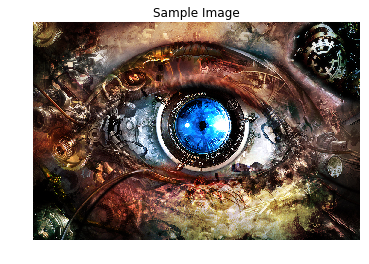

In [31]:
# Display the images
cvutils.imshow("Sample Image", sample)

### Inspect the Image 

In [28]:
# Check the shape of the sample image 
sample.shape

(728, 1092, 3)

![](cv3.jpg)

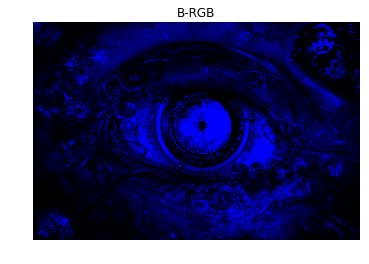

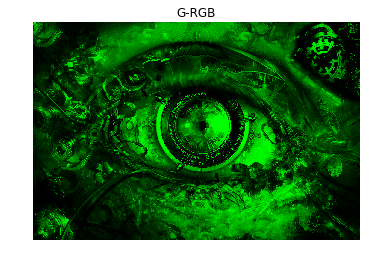

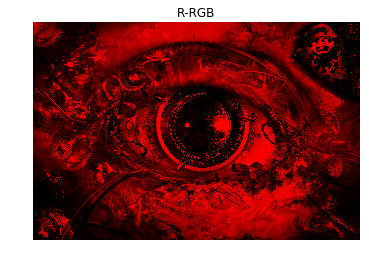

In [29]:
b = sample.copy()

# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0

g = sample.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = sample.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0

# RGB - Blue
cvutils.imshow('B-RGB', b)

# RGB - Green
cvutils.imshow('G-RGB', g)

# # RGB - Red
cvutils.imshow('R-RGB', r)

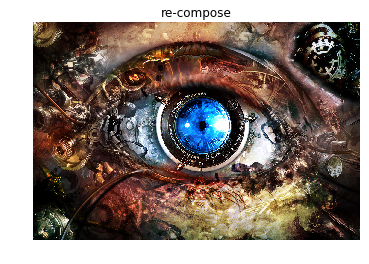

In [32]:
cvutils.imshow('re-compose', r+g+b)

## Object recognition 

* Technology in the field of computer vision for finding and identifying objects in an image or video sequence. 

![](cv4.jpeg)

## Object Recognition with Template Matching 
* #### Template Matching is a high-level machine vision technique that identifies the parts on an image that match a predefined template.

* #### Flexible and relatively straightforward to use. 

* #### TM used in classifying an object by comparing portions of images with another image.
![](TM1.png)

## Template matching using Correlation

* #### Correlation is a statistical measure to identify "Similarity" between data elements. 
![](ccor.png)

* #### Correlation values range from -1 to 1 ( 1 being highly similar, 0 being not similar at all, -1 similarity in reverse)

* #### Template is slided over the image pixel by pixel and correlation is measured at each step. 

* #### Areas in in correlation map showing high correlation (white spots) indicate a match. 

## Template
![](xt.png)

## Image
![](xi.png)

## Correlation
![](xcorr.png)

## The Process
![](ccor2.png)

## Our Problem 

### Where is Wally ??

Where's Wally is the ultimate game of hide and seek for the human eye. He’s actually “hiding” in plain sight — but due to all the noise and distraction, we can’t pick him out immediately!

![](wallyface.jpeg)
https://www.google.co.uk/search?q=wally+puzzles&source=lnms&tbm=isch&sa=X&ved=0ahUKEwixhcWgl5DdAhULZFAKHVgvB5wQ_AUICigB&biw=1289&bih=803

#### Find wally in a puzzle using correlation based template matching. 



Next, we will load the source image in a numpy array `im_src` and the template image in another numpy array `im_tplt`. We will also display the images. We'll look for the template image in the source. 

Populating the interactive namespace from numpy and matplotlib


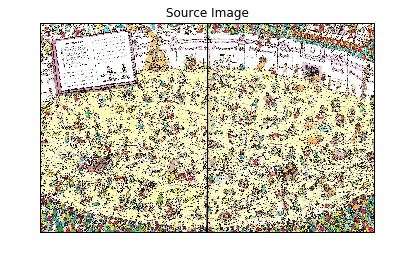

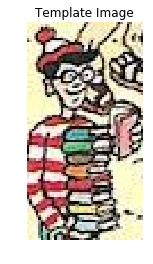

In [36]:
# Load the images
%pylab inline
im_src = cv2.imread("wally.jpg")
im_tplt = cv2.imread("wally-template.jpg")
# Display the images
cvutils.imshow("Source Image", im_src)
cvutils.imshow("Template Image", im_tplt)

We now iterate over all the 6 methods available for use in OpenCV. The `cv2.matchTemplate` function returns a mask based on the method used for performing template matching in the source image. 
Based on the methods used, we need to look up global maxima or global minima in the mask image.
1. In Sum of Squared Difference and Normalized Sum of Squared Difference, we need to look for minimas  
2. In Correlation Coefficient and Normalized Correlation Coefficient, we need to look for maximas
3. In Correlation and Normalized Correlation, we need to look for maximas

We will use `cv2.minMaxLoc` function to find the global maxima and global minima. Once we have calculated the extremas, we draw the matched template on the input image and display it. Additionally, we also display the template matching mask.

Populating the interactive namespace from numpy and matplotlib


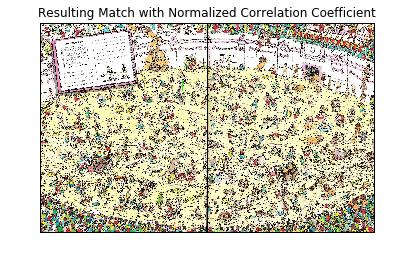

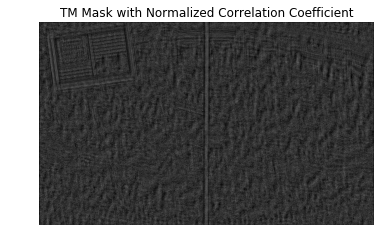

In [41]:
%pylab inline
# Get the Template Matching Mask
result = cv.matchTemplate(im_src, im_tplt, cv2.TM_CCOEFF_NORMED)

# Get the position of the template match 
_, _, minLoc, maxLoc = cv.minMaxLoc(result)

# Getthe  top left co-ordinates
top_left = maxLoc

# Get the bottom right co-ordinate
bottom_right = (top_left[0]+im_tplt.shape[1], top_left[1]+im_tplt.shape[0]) 

# Draw the matched template on the input image and display it 
im_display = im_src.copy()
cv2.rectangle(im_display, top_left, bottom_right, (0, 255,0), 2)
cvutils.imshow('Resulting Match with Normalized Correlation Coefficient', im_display)

# Display the template matching mask
cvutils.imshow('TM Mask with Normalized Correlation Coefficient', result)

## More Applications on the slides

Find Wally with deep neural networks
https://towardsdatascience.com/how-to-find-wally-neural-network-eddbb20b0b90